In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize']=(20,5)
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import pyarrow.parquet as pq

In [14]:
df=pd.read_parquet("d:/complete.parquet")
df['Kwh'] = df['Kwh'] / 1000
df_name=pd.read_excel("D:/Data_Files/NPCL_NAMES.xlsx")

In [20]:
df1=df.groupby('sensor')

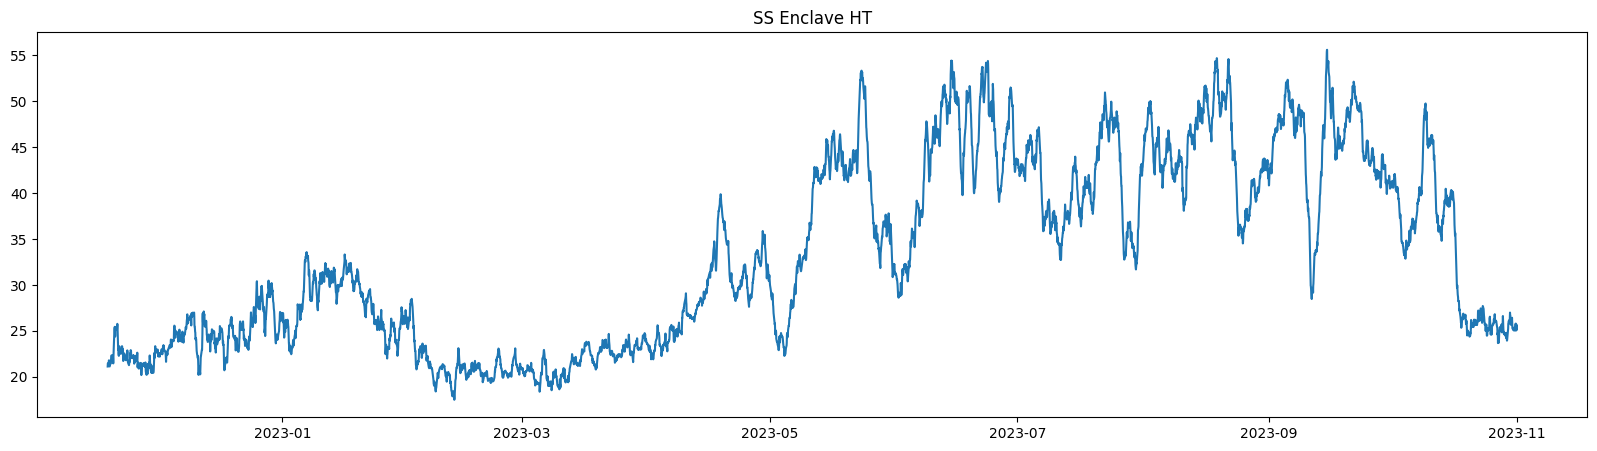

0 , zero count= 0 total count= 8330  SS Enclave HT
data  is stationary with score 0.048117299164420535


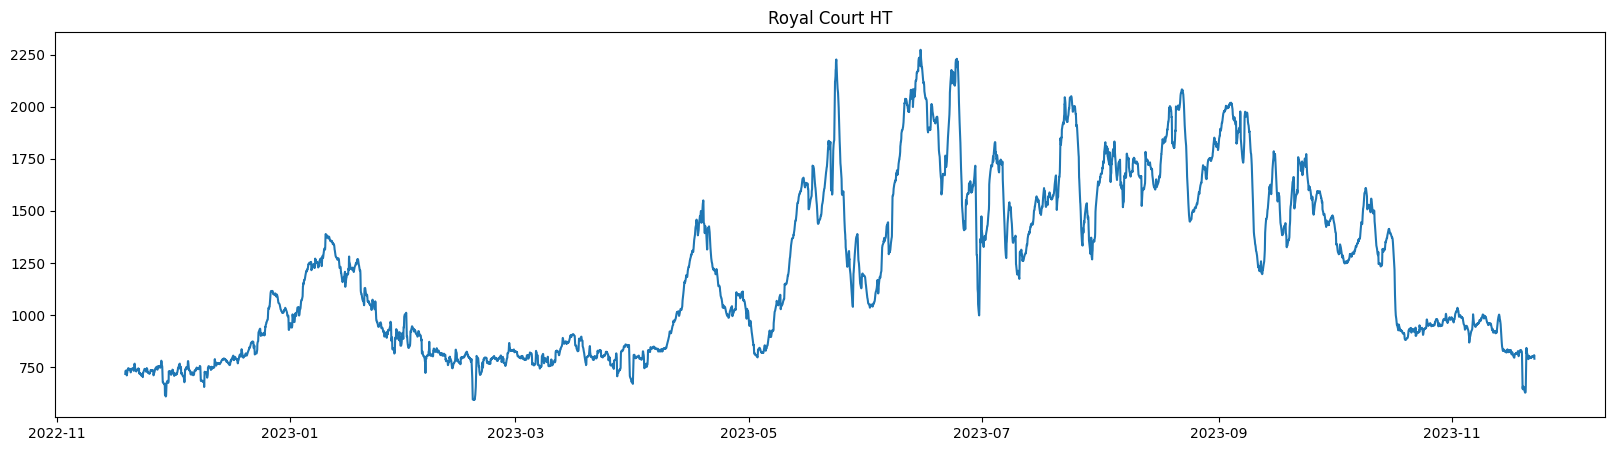

1 , zero count= 0 total count= 8846  Royal Court HT
data  is stationary with score 0.03603389131418538


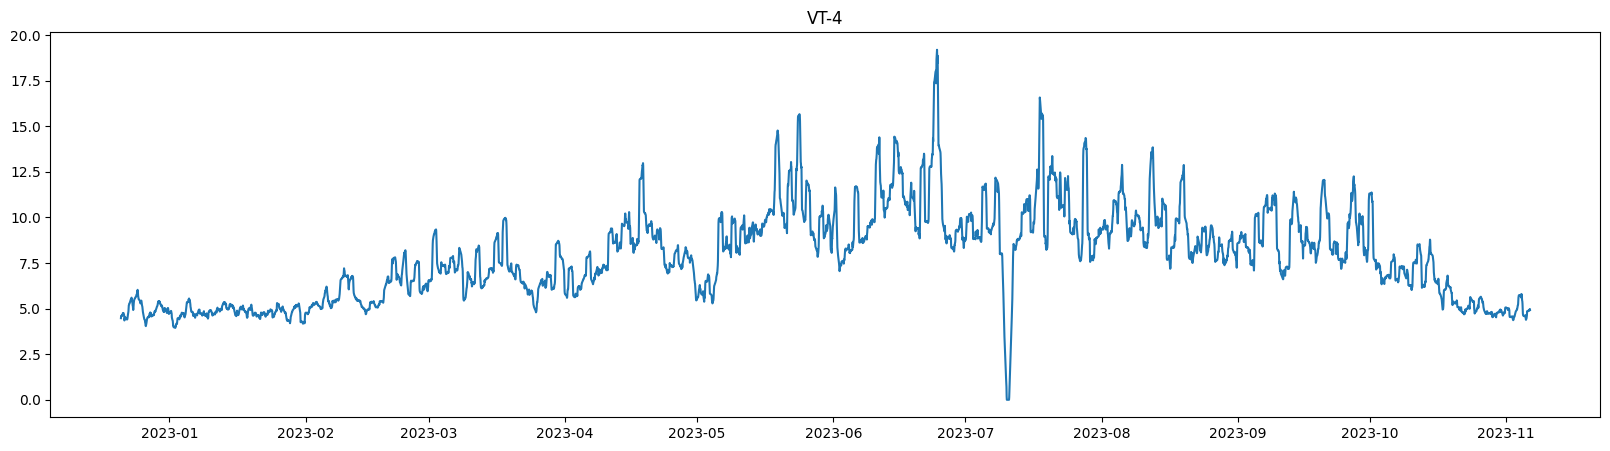

2 , zero count= 13 total count= 7693  VT-4
data  is stationary with score 0.00016706398050577752


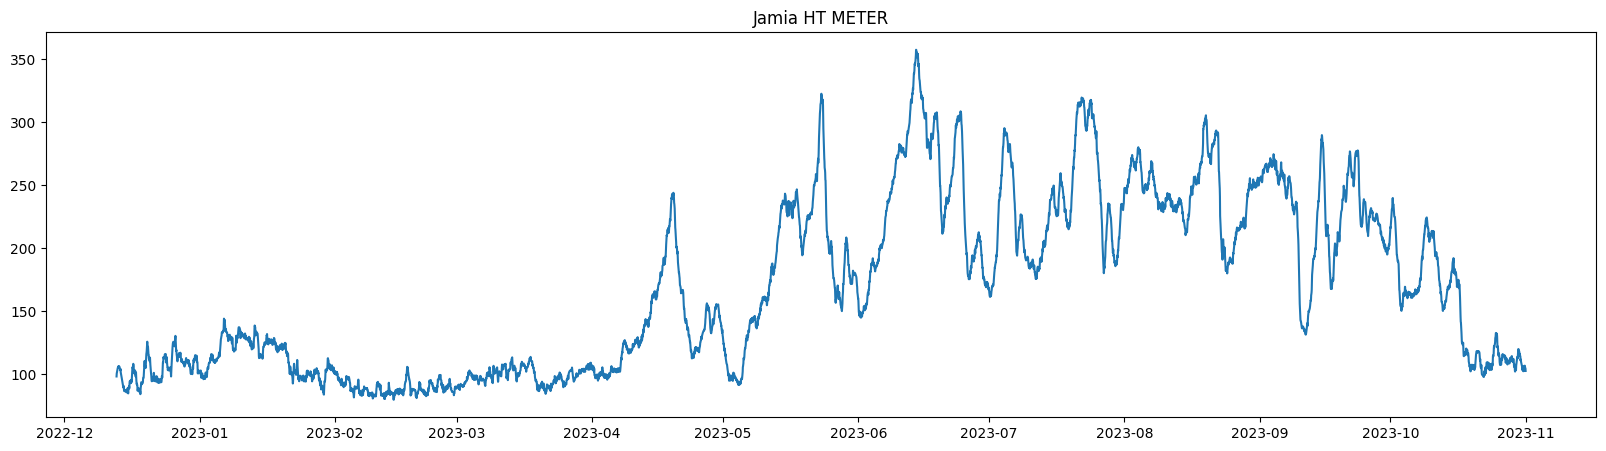

3 , zero count= 0 total count= 7754  Jamia HT METER
data  is stationary with score 0.016453208107549657

data is not stationary with score 0.07683304928952557 , Migsun SEN HT


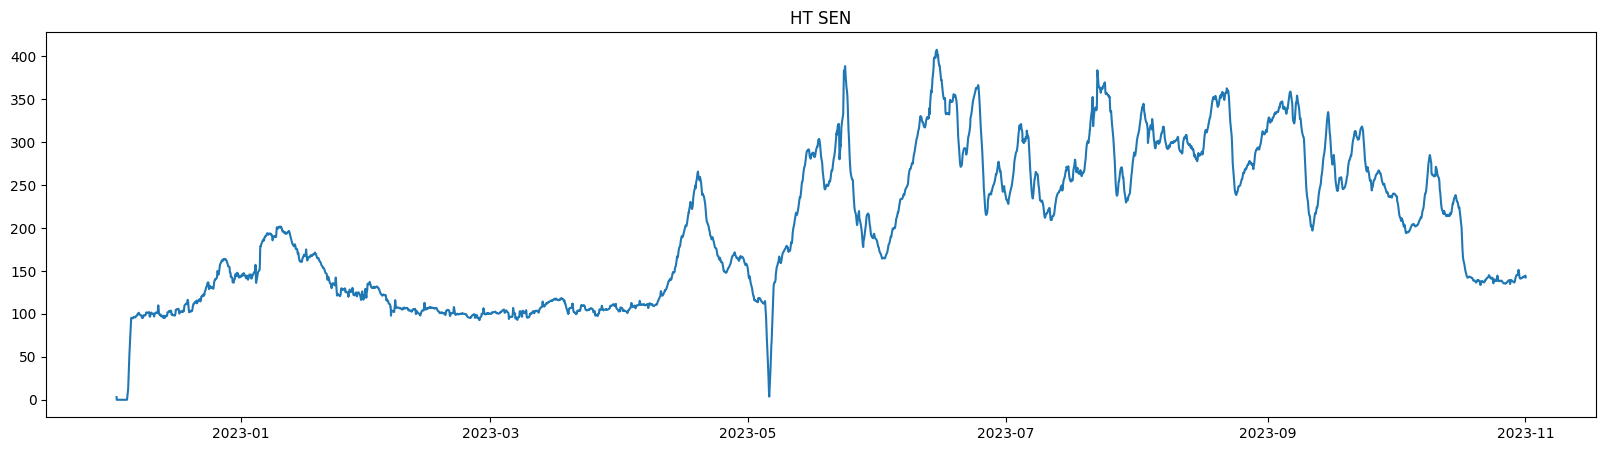

4 , zero count= 59 total count= 8006  HT SEN
data  is stationary with score 0.014773450685557535


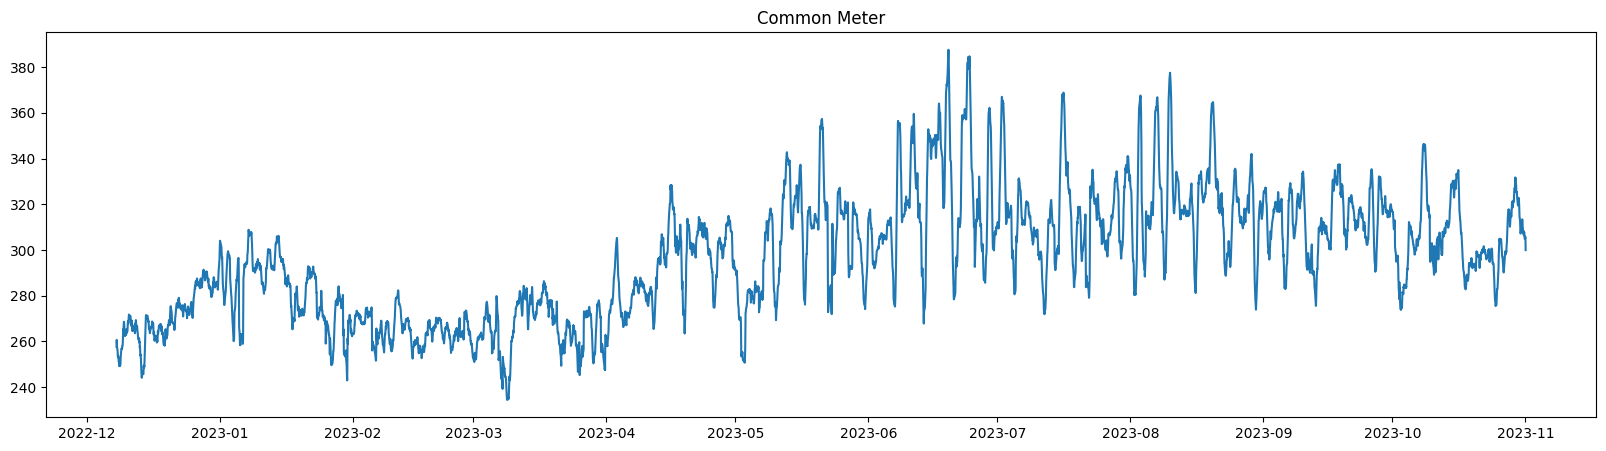

5 , zero count= 0 total count= 7875  Common Meter
data  is stationary with score 7.616766188070996e-07


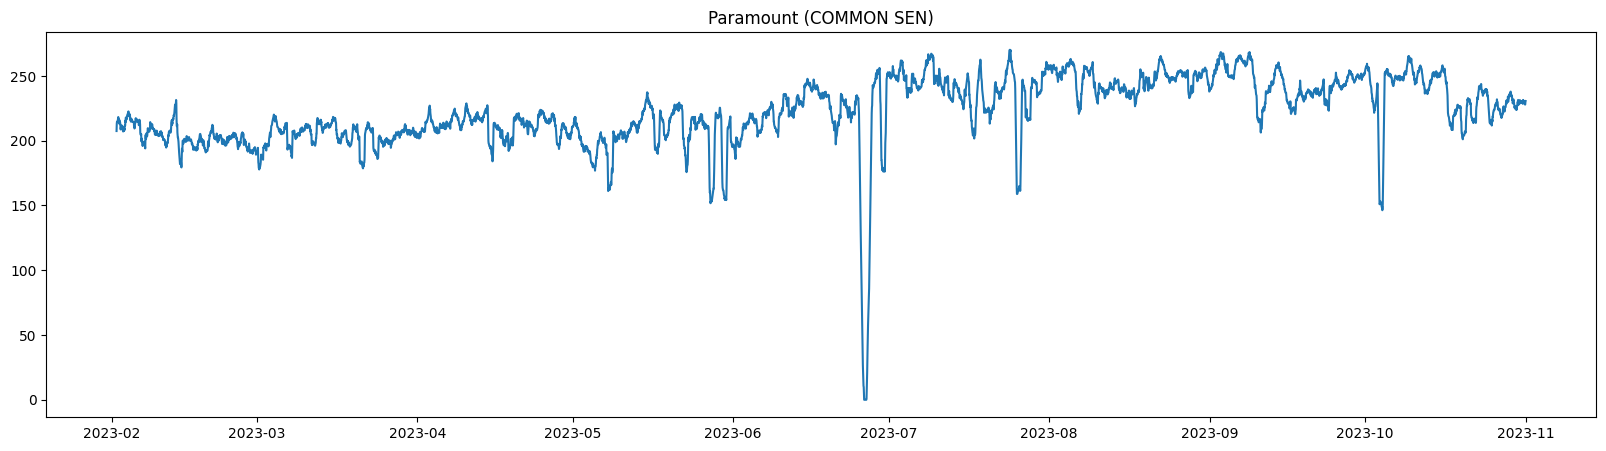

6 , zero count= 11 total count= 6530  Paramount (COMMON SEN)
data  is stationary with score 3.7312365291089103e-08


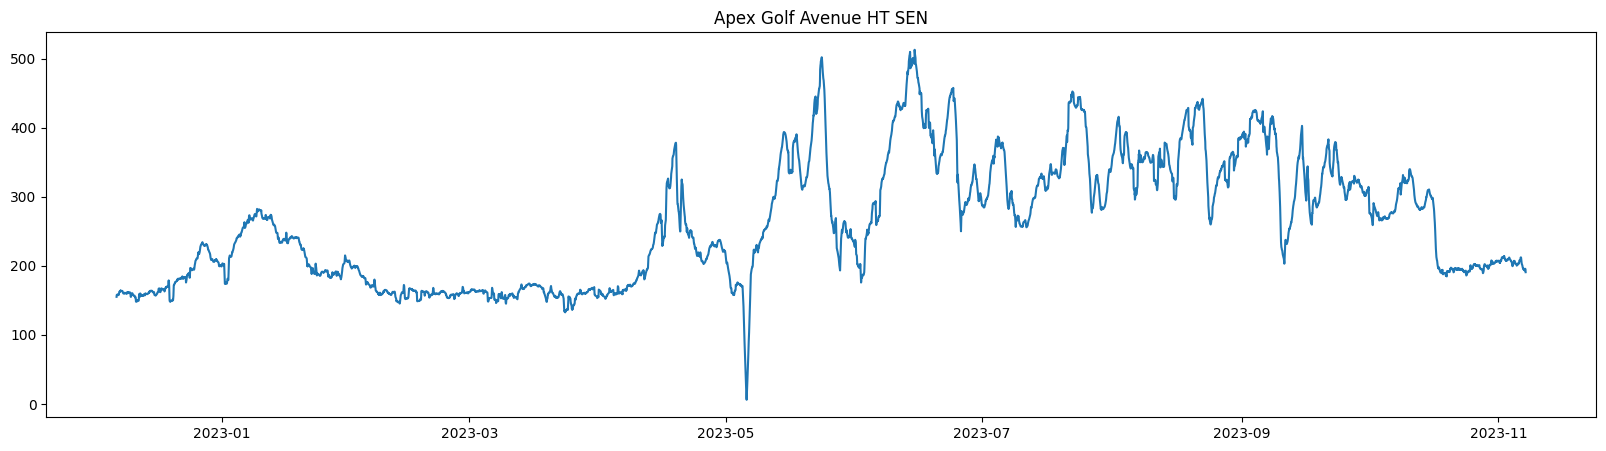

7 , zero count= 0 total count= 8054  Apex Golf Avenue HT SEN
data  is stationary with score 0.0029227083511392357

data is not stationary with score 0.05102230588115323 , RAJHANS HT SEN


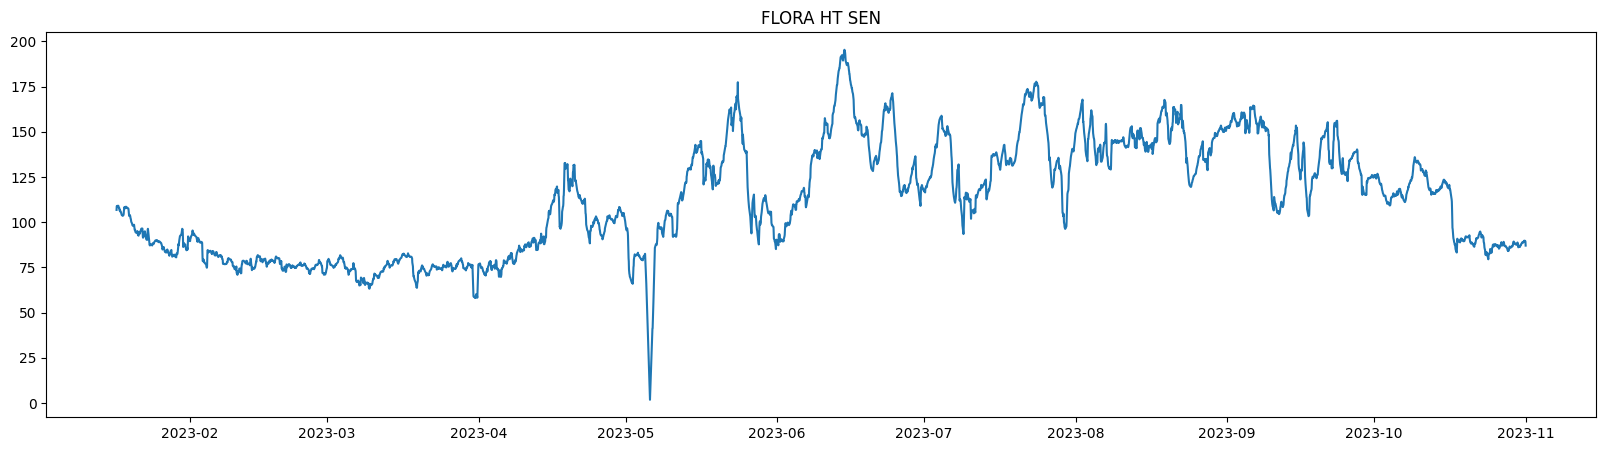

8 , zero count= 0 total count= 6914  FLORA HT SEN
data  is stationary with score 0.01527026190875134

data is not stationary with score 0.05047348941651133 , Assotech sensor

data is not stationary with score 0.09434018298998775 , VT-5

data is not stationary with score 0.0643303312092855 , omaxe NRI City housing

data is not stationary with score 0.05378554292641683 , VT-6


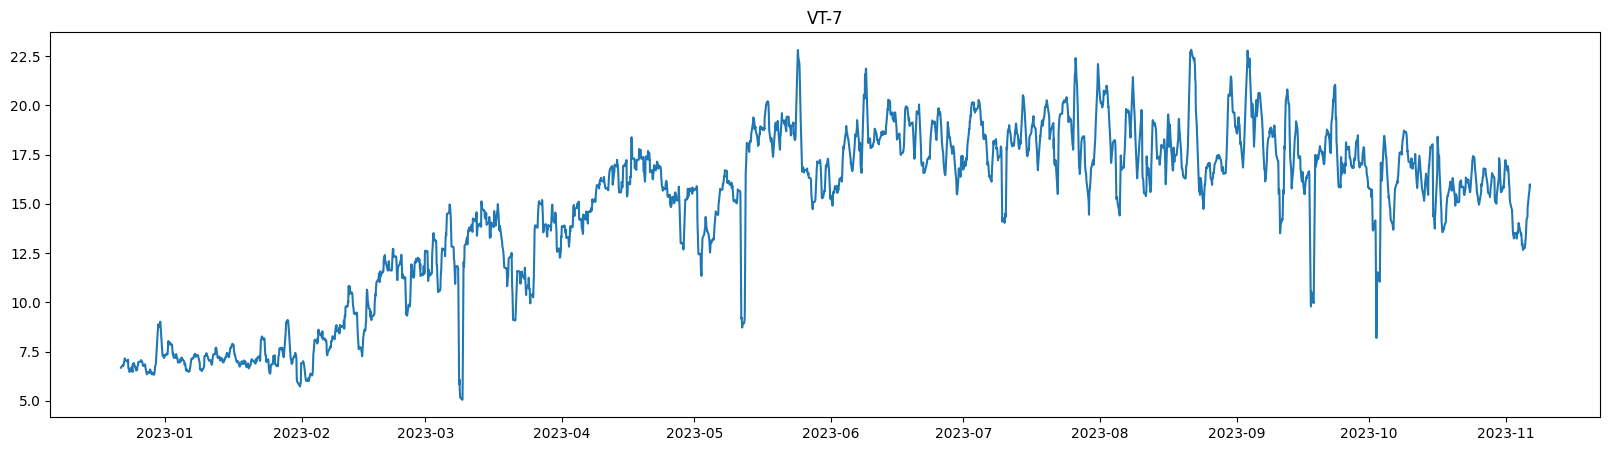

9 , zero count= 0 total count= 7669  VT-7
data  is stationary with score 0.02301898195783719


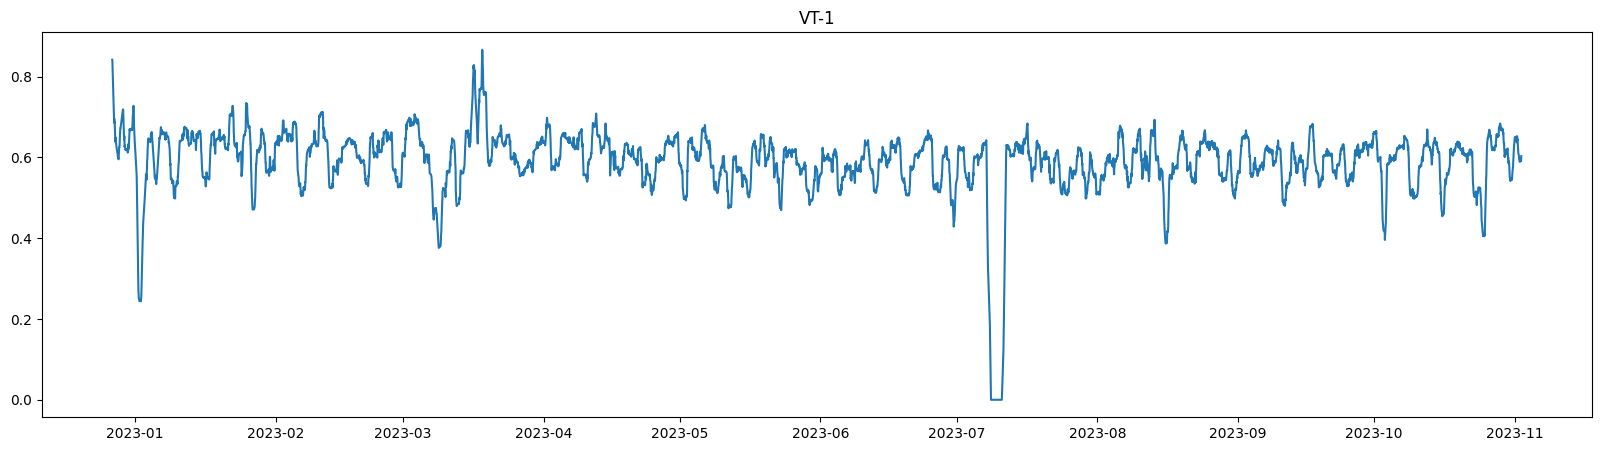

10 , zero count= 58 total count= 7452  VT-1
data  is stationary with score 6.8741787586115246e-15


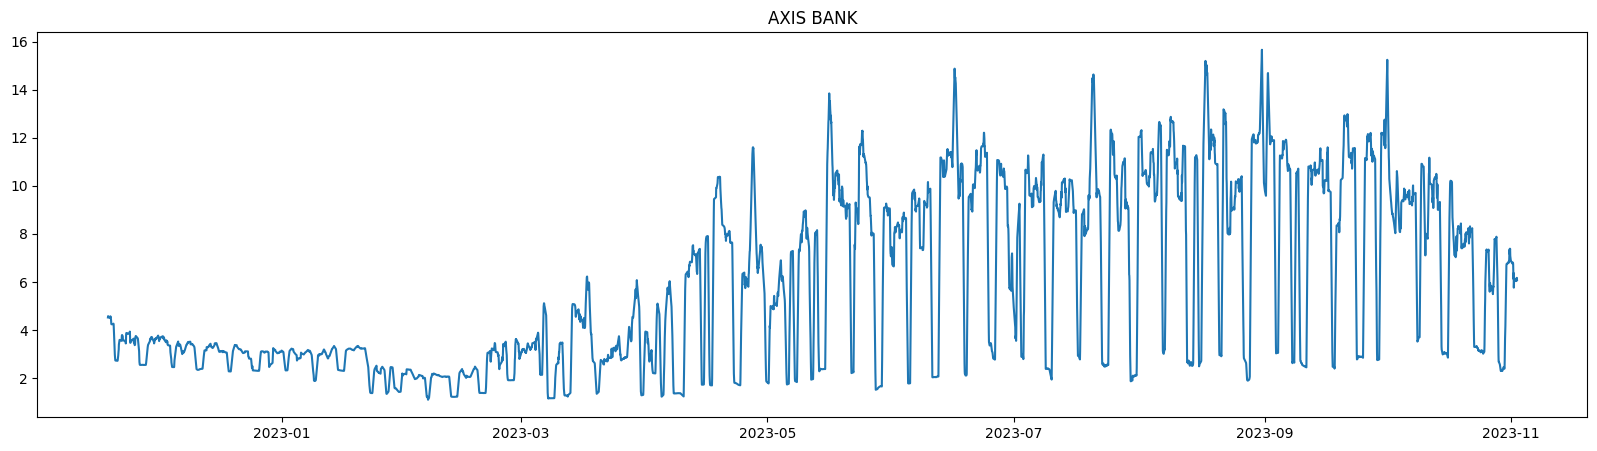

11 , zero count= 0 total count= 8364  AXIS BANK
data  is stationary with score 4.2907719812064915e-12


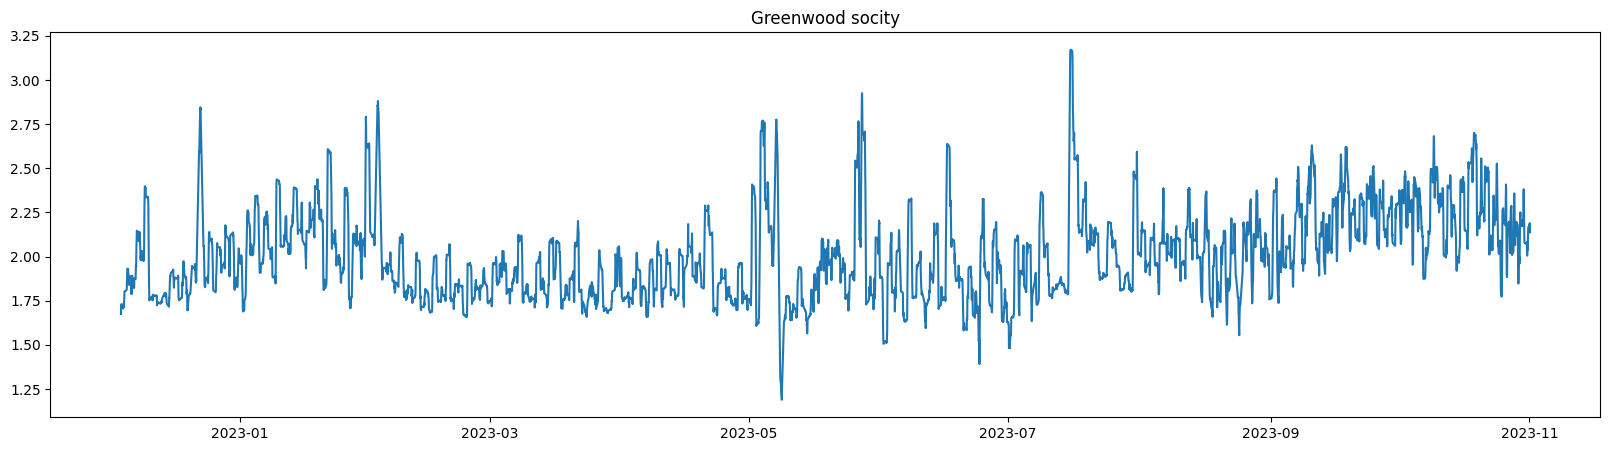

12 , zero count= 0 total count= 7973  Greenwood socity
data  is stationary with score 3.3633002850115246e-12


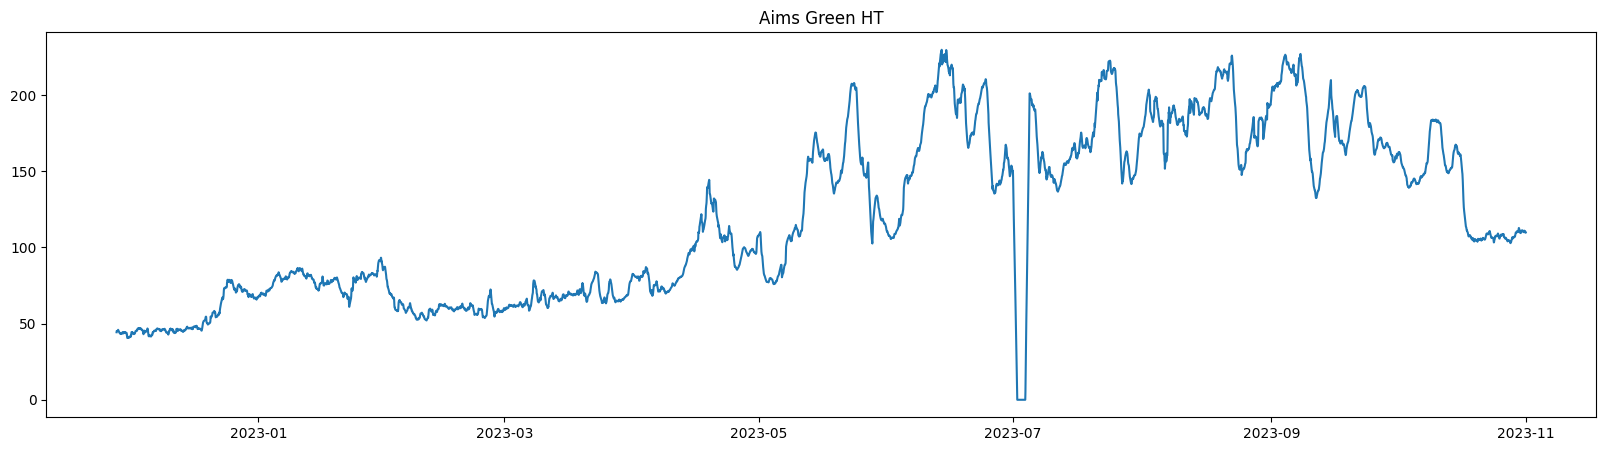

13 , zero count= 47 total count= 8114  Aims Green HT
data  is stationary with score 0.004012664103442573


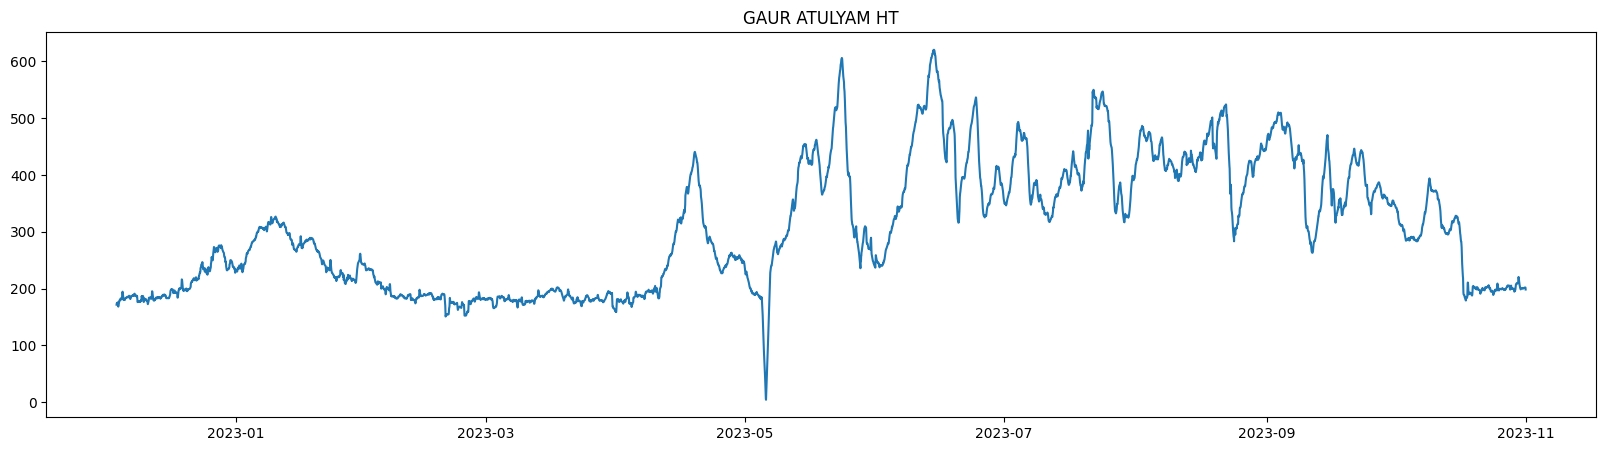

14 , zero count= 0 total count= 7970  GAUR ATULYAM HT
data  is stationary with score 0.013219192754404672

data is not stationary with score 0.060406710850247076 , JM Florance HT


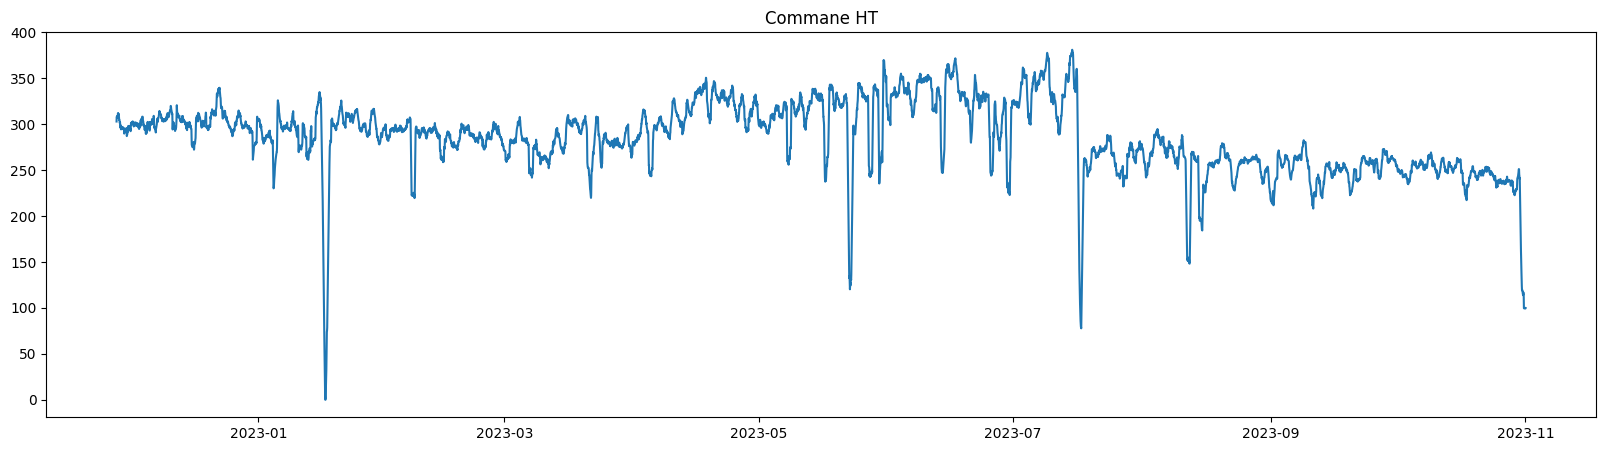

15 , zero count= 2 total count= 8115  Commane HT
data  is stationary with score 6.146018655545168e-08


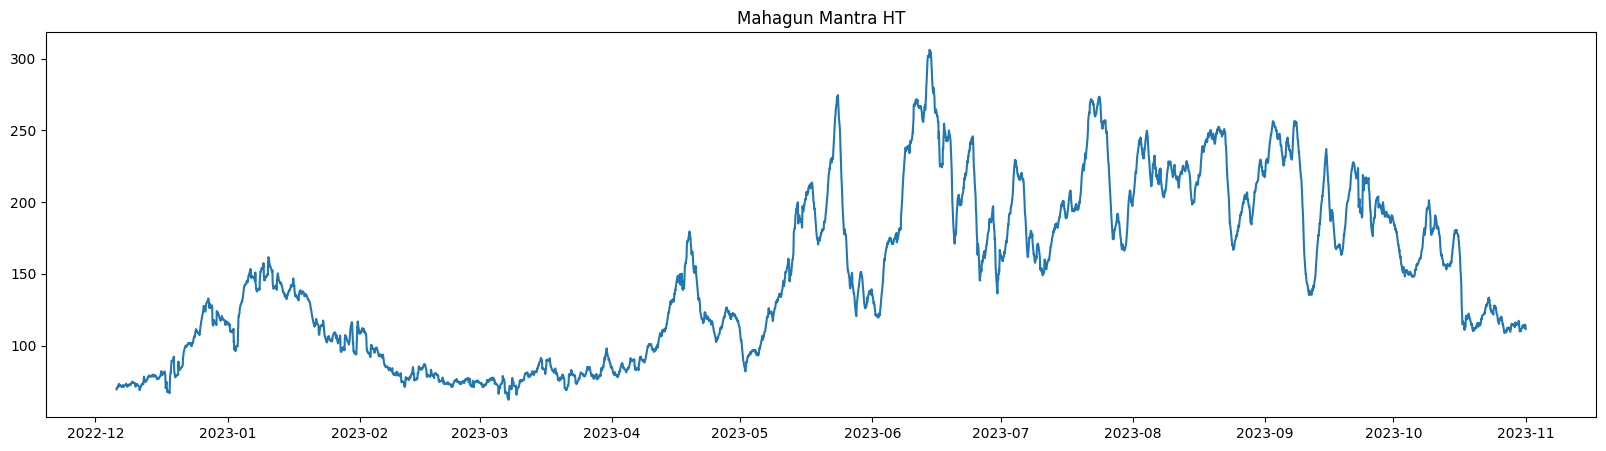

16 , zero count= 0 total count= 7922  Mahagun Mantra HT
data  is stationary with score 0.021296302679650284


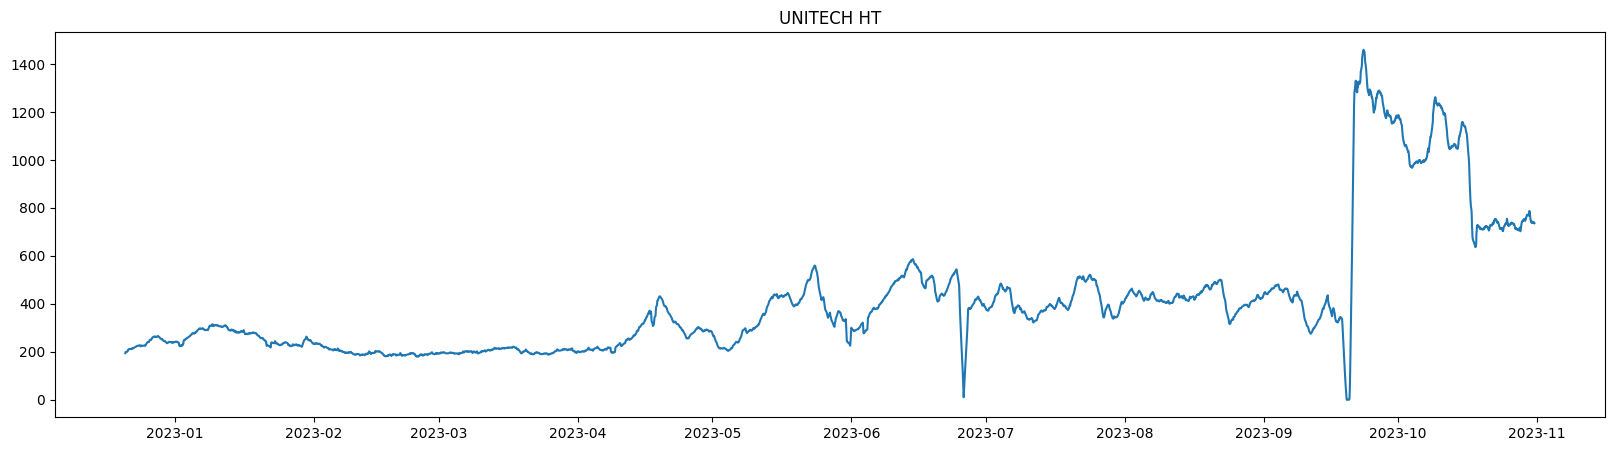

17 , zero count= 0 total count= 7549  UNITECH HT
data  is stationary with score 0.04752216566695732

data is not stationary with score 0.0719808337619899 , Dev Sai HT Meter


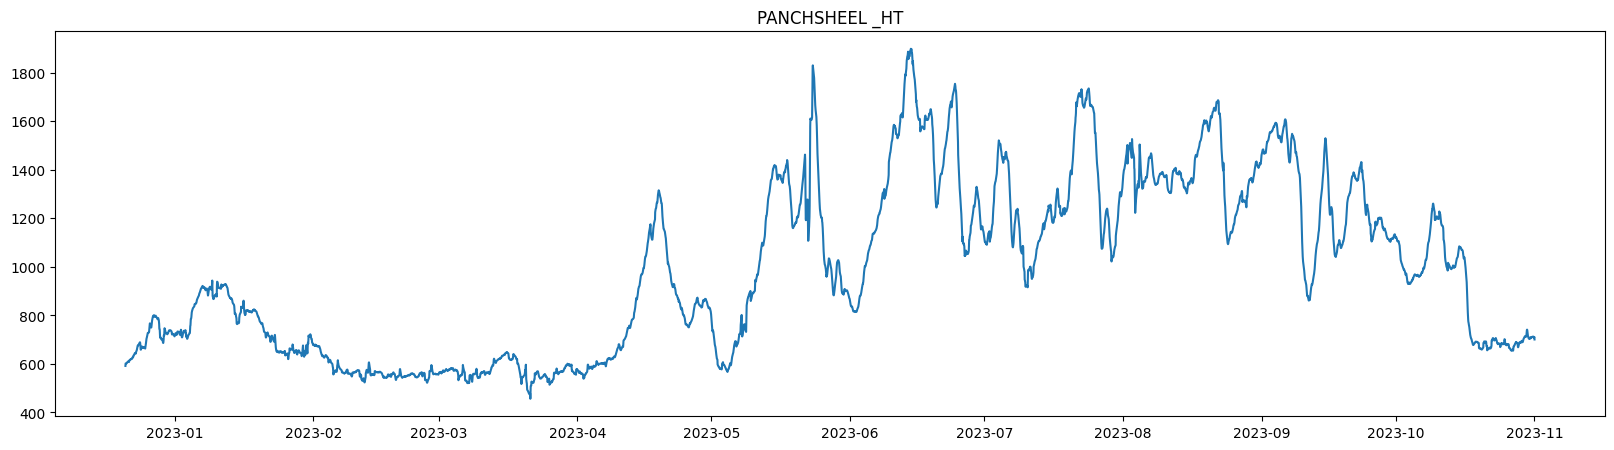

18 , zero count= 0 total count= 7563  PANCHSHEEL _HT
data  is stationary with score 0.02075726518053165

data is not stationary with score 0.051532431829950355 , Saya Zion Ht


In [18]:
i=0
dct={}
stationary_ids_with_rolling=[]

for items , data in df1:
    sensor_df=data
    
#   """Validation"
    filtered_df = sensor_df[(
                    (sensor_df['R_Voltage'] == 0) | (sensor_df['Y_Voltage'] == 0) |
                    (sensor_df['B_Voltage'] == 0)) & ((sensor_df['R_Current'] == 0) | 
                    (sensor_df['Y_Current'] == 0) | (sensor_df['B_Current'] == 0))]
    filtered_df['Kwh'] = 0
#   """Validation done"

#   """date time conversion and time series making"
    sensor_df['Clock'] = pd.to_datetime(sensor_df['Clock'])
    sensor_df.set_index(['Clock'], inplace=True, drop=True)
    sensor_df = sensor_df[sensor_df.index >= '2022-11-18 00:00:00']
    # print(df.head())
#

#   """resampling"
    dfresample = sensor_df[['Kwh']].resample(rule='1H').sum()
#   """resampling done"

#   """rolling"
    dfresample['Kwh'] = dfresample['Kwh'].rolling(window=24).mean()
    dfresample.dropna(inplace=True)     
#   """rolling"

#   """ adding name column """
    name_row = df_name[df_name['id'] == items]
    selected_name = name_row[['name']]
    dfresample['Name'] = selected_name['name'].iloc[0] if not selected_name.empty else None
#    """ name done """

#   """outage handling"
    df2=dfresample[(dfresample['Kwh']==0)]
    # print(len(df2))
#   """"
    dfresample['sensor']=items
#   """stationary check"
    result=adfuller(dfresample['Kwh'],autolag='AIC')
    if result[1]<0.05:
            plt.plot(dfresample['Kwh'])
            plt.title((dfresample['Name'].iloc[0]))
            plt.show()
            print(i,", zero count=",len(df2),"total count=",len(dfresample),"",dfresample['Name'].iloc[0])
            print('data  is stationary with score', result[1])
            i+=1
            stationary_ids_with_rolling.append((items))
    else:
        print()
        print('data is not stationary with score',result[1],",",dfresample['Name'].iloc[0])

    sensor_df 



In [19]:
stationary_ids_with_rolling

['5f718b613291c7.03696209',
 '5f718c439c7a78.65267835',
 '614366bce31a86.78825897',
 '6148740eea9db0.29702291',
 '625fb44c5fb514.98107900',
 '625fb9e020ff31.33961816',
 '6260fd4351f892.69790282',
 '627cd4815f2381.31981050',
 '629094ee5fdff4.43505210',
 '62aad7f5c65185.80723547',
 '62b15dfee341d1.73837476',
 '62b595eabd9df4.71374208',
 '6349368c306542.16235883',
 '634e7c43038801.39310596',
 '6399a18b1488b8.07706749',
 '63a4195534d625.00718490',
 '63a4272631f153.67811394',
 '63aa9161b9e7e1.16208626',
 '63ca403ccd66f3.47133508']

In [10]:
dfresample

,Kwh,Name,sensor
Clock,,,
2023-02-04 23:00:00,339.658333,Saya Zion Ht,641c17bc672215.97177522
2023-02-05 00:00:00,344.558333,Saya Zion Ht,641c17bc672215.97177522
2023-02-05 01:00:00,343.762500,Saya Zion Ht,641c17bc672215.97177522
2023-02-05 02:00:00,342.962500,Saya Zion Ht,641c17bc672215.97177522
2023-02-05 03:00:00,341.895833,Saya Zion Ht,641c17bc672215.97177522
...,...,...,...
2023-10-31 21:00:00,415.462500,Saya Zion Ht,641c17bc672215.97177522
2023-10-31 22:00:00,414.387500,Saya Zion Ht,641c17bc672215.97177522
2023-10-31 23:00:00,413.587500,Saya Zion Ht,641c17bc672215.97177522


In [ ]:
for i in range(10):
    my_dict[f'key_{i}'] = i

print(my_dict)
